In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [2]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
class Neuron:
    
    def __init__(self,n_inputs: int):
        self.weights = torch.randn(n_inputs, 1, requires_grad=True)
        self.bias = torch.randn(1, 1, requires_grad=True)
    def __call__(self, inputs: torch.Tensor):
        output = inputs @ self.weights + self.bias
        return output
    # def backward(self):
    #     self.dweights = self.weights.grad
    #     self.dbias = self.bias.grad

In [4]:
class SquaredLoss:
    def __call__(self,
                 y_pred: torch.Tensor,
                 y_true: torch.Tensor):
        return torch.mean((y_true - y_pred) ** 2)

In [5]:
X.shape[1]

4

In [13]:
neuron = Neuron(X.shape[1])
criterion = SquaredLoss()
lr = 0.01

optimizer = torch.optim.SGD([neuron.weights, neuron.bias], lr=0.01)

for epoch in range(100):
    for x_example, y_example in zip(X, y):
        optimizer.zero_grad()
        y_pred = neuron(x_example)
        loss = criterion(y_pred, y_example)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 41.30321502685547
Epoch: 10 | Loss: 0.0
Epoch: 20 | Loss: 5.820766091346741e-11
Epoch: 30 | Loss: 5.820766091346741e-11
Epoch: 40 | Loss: 5.820766091346741e-11
Epoch: 50 | Loss: 5.820766091346741e-11
Epoch: 60 | Loss: 5.820766091346741e-11
Epoch: 70 | Loss: 5.820766091346741e-11
Epoch: 80 | Loss: 5.820766091346741e-11
Epoch: 90 | Loss: 5.820766091346741e-11


In [7]:
neuron.weights, coef

(tensor([[35.4001],
         [12.5798],
         [13.7538],
         [83.3879]], requires_grad=True),
 array([35.40013404, 12.57984635, 13.75375786, 83.38787899]))

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [14]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.5 * torch.rand(X.size()) 

In [15]:
class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

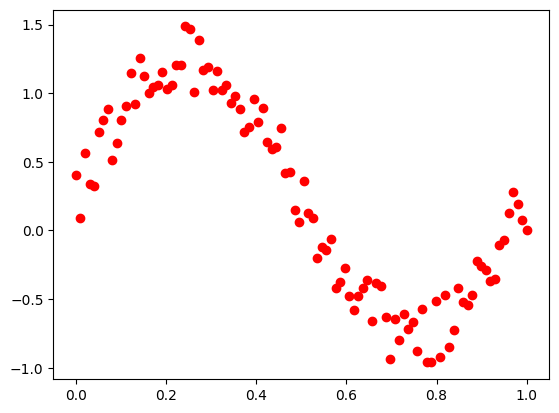

In [16]:
plt.scatter(X, y,color="r");

In [25]:

class Linear(nn.Module):
    def __init__(self, n_f, n_n):
        super(Linear, self).__init__()  
        self.weights = nn.Parameter(torch.randn(n_f, n_n)) 
        self.bias = nn.Parameter(torch.randn(1, n_n)) 

    def forward(self, inputs: torch.Tensor):
        output = inputs @ self.weights + self.bias
        return output

class MSELoss:
    def __call__(self,
                 y_pred: torch.Tensor,
                 y_true: torch.Tensor):
        return torch.mean((y_true - y_pred) ** 2)
class Relu(nn.Module):
    def __call__(self,x):
        x[x<0]=0
        return x

In [26]:
fc1 = Linear(1,20)
fc12=  Linear(20,10)
fc2=  Linear(10,1)
relu= Relu()

criterion = MSELoss()
lr = 0.01
los = []

for epoch in range(20000):
        y_pred1 = relu(fc12(relu(fc1(X))))
        y_pred  = fc2(y_pred1)

        loss = criterion(y_pred, y)
        loss.backward()
        with torch.no_grad():
            fc1.weights -= lr * fc1.weights.grad
            fc1.bias -= lr * fc1.bias.grad
            fc2.weights -= lr * fc2.weights.grad
            fc2.bias -= lr * fc2.bias.grad   
            fc12.weights -= lr * fc12.weights.grad
            fc12.bias -= lr * fc12.bias.grad                       
        fc1.weights.grad.zero_()
        fc1.bias.grad.zero_()
        fc2.weights.grad.zero_()
        fc2.bias.grad.zero_()
        fc12.weights.grad.zero_()
        fc12.bias.grad.zero_()
        los.append(loss.item())
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 431.2594909667969
Epoch: 1000 | Loss: 0.09389922022819519
Epoch: 2000 | Loss: 0.03280031308531761
Epoch: 3000 | Loss: 0.023424964398145676
Epoch: 4000 | Loss: 0.022483982145786285
Epoch: 5000 | Loss: 0.022342799231410027
Epoch: 6000 | Loss: 0.02210955135524273
Epoch: 7000 | Loss: 0.022077105939388275
Epoch: 8000 | Loss: 0.0220553707331419
Epoch: 9000 | Loss: 0.022036179900169373
Epoch: 10000 | Loss: 0.02201755717396736
Epoch: 11000 | Loss: 0.022000549361109734
Epoch: 12000 | Loss: 0.021984919905662537
Epoch: 13000 | Loss: 0.02197112888097763
Epoch: 14000 | Loss: 0.021957749500870705
Epoch: 15000 | Loss: 0.02194615826010704
Epoch: 16000 | Loss: 0.021934738382697105
Epoch: 17000 | Loss: 0.021924464032053947
Epoch: 18000 | Loss: 0.02191455103456974
Epoch: 19000 | Loss: 0.02190578170120716


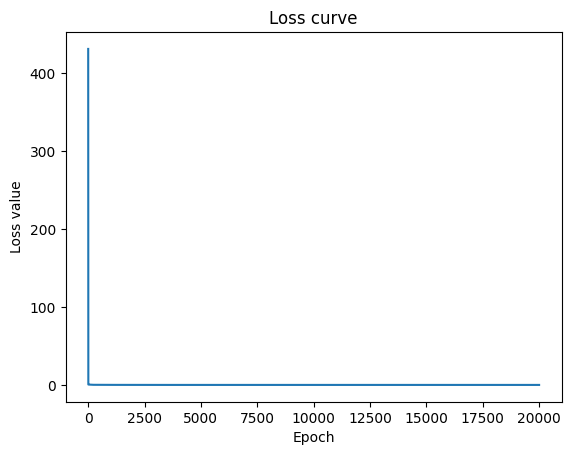

In [27]:
plt.plot(range(len(los)),los)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss value");

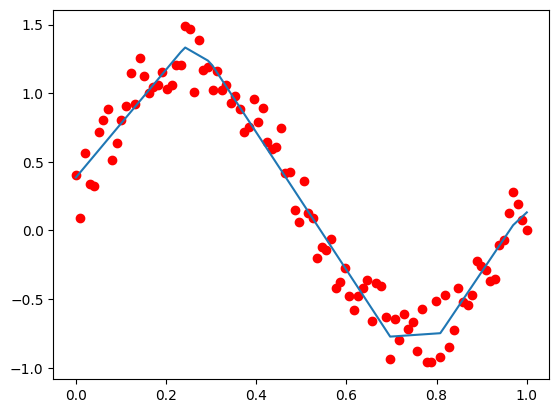

In [28]:
plt.plot(X.detach(),y_pred.detach())
plt.scatter(X, y,color="r");

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [21]:
import torch.optim as optim
import torch.nn as nn

In [29]:
fc1 = Linear(1,20)
fc12=  Linear(20,10)
fc2=  Linear(10,1)
relu= Relu()

model =  nn.Sequential(fc1,
         relu,
         fc12,
         relu,
         fc2)

optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
losses = []

epochs = 20000
for epoch in range(epochs):
    # Прямой проход
    y_pred = model(X)
    
    # Вычисление потерь
    loss = criterion(y_pred, y)
    
    # Обратное распространение
    loss.backward()
    
    # Шаг оптимизатора
    optimizer.step()
    
    # Обнуление градиентов
    optimizer.zero_grad()

    # Запись потерь для графика
    losses.append(loss.item())
    
    # Вывод каждые 1000 эпох
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 21.297975540161133
Epoch: 1000 | Loss: 0.1290796995162964
Epoch: 2000 | Loss: 0.04360967501997948
Epoch: 3000 | Loss: 0.03902754187583923
Epoch: 4000 | Loss: 0.04304243624210358
Epoch: 5000 | Loss: 0.02980765327811241
Epoch: 6000 | Loss: 0.029742779210209846
Epoch: 7000 | Loss: 0.029590003192424774
Epoch: 8000 | Loss: 0.033262502402067184
Epoch: 9000 | Loss: 0.025972897186875343
Epoch: 10000 | Loss: 0.02490437589585781
Epoch: 11000 | Loss: 0.024781959131360054
Epoch: 12000 | Loss: 0.02403777278959751
Epoch: 13000 | Loss: 0.023497186601161957
Epoch: 14000 | Loss: 0.023962795734405518
Epoch: 15000 | Loss: 0.024383194744586945
Epoch: 16000 | Loss: 0.02354244515299797
Epoch: 17000 | Loss: 0.022852860391139984
Epoch: 18000 | Loss: 0.020069396123290062
Epoch: 19000 | Loss: 0.019984817132353783


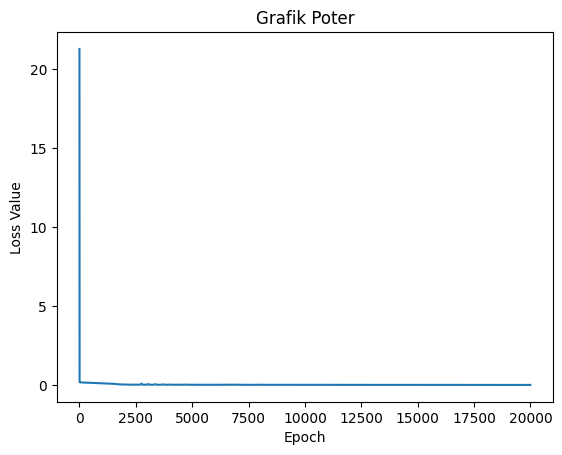

In [31]:
plt.plot(range(len(losses)), losses)
plt.title("Grafik Poter")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.show()

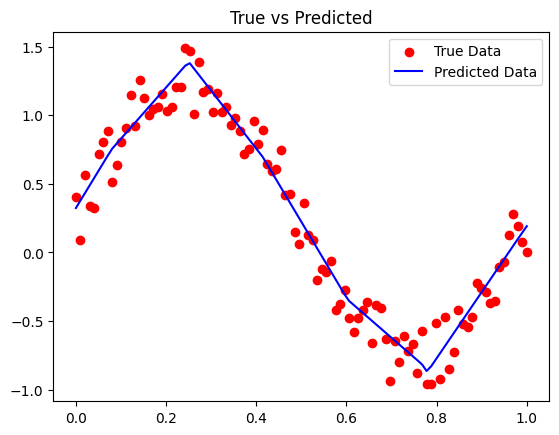

In [32]:
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X, y, color="r", label="True Data")
plt.plot(X, y_pred, label="Predicted Data", color="b")
plt.title("True vs Predicted")
plt.legend()
plt.show()

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [39]:
class Neuron(nn.Module):
    def __init__(self, n_inputs: int):
        super(Neuron, self).__init__()  # Вызов конструктора базового класса nn.Module
        self.weights = nn.Parameter(torch.randn(n_inputs, 1))  # Параметры как nn.Parameter
        self.bias = nn.Parameter(torch.randn(1))  # Параметры как nn.Parameter

    def forward(self, inputs: torch.Tensor):  # Метод forward для прямого прохода
        return inputs @ self.weights + self.bias

In [40]:
# Создание модели
neuron = Neuron(X.shape[1])

# Инициализация оптимизатора
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01)

# Убедитесь, что параметры доступны
print(list(neuron.parameters()))  # Это должно вывести веса и смещения


[Parameter containing:
tensor([[-0.9905]], requires_grad=True), Parameter containing:
tensor([-1.9196], requires_grad=True)]


In [42]:
optimizer = optim.SGD(neuron.parameters(), lr=0.01)  # Оптимизатор

# Обучение модели
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # Прямой проход (forward)
        y_pred = neuron(x_example)
        loss = criterion(y_pred, y_example)
        
        # Обратное распространение (backward)
        optimizer.zero_grad()  # Обнуляем градиенты
        loss.backward()  # Вычисляем градиенты
        optimizer.step()  # Обновляем параметры модели
        
    # Вывод каждые 10 эпох
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 0.36031466722488403
Epoch: 10 | Loss: 0.3603156805038452
Epoch: 20 | Loss: 0.36031579971313477
Epoch: 30 | Loss: 0.36031579971313477
Epoch: 40 | Loss: 0.36031579971313477
Epoch: 50 | Loss: 0.36031579971313477
Epoch: 60 | Loss: 0.36031579971313477
Epoch: 70 | Loss: 0.36031579971313477
Epoch: 80 | Loss: 0.36031579971313477
Epoch: 90 | Loss: 0.36031579971313477


3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

Epoch: 0 | Loss: 0.0199740007519722
Epoch: 1000 | Loss: 0.01799086295068264
Epoch: 2000 | Loss: 0.017948530614376068
Epoch: 3000 | Loss: 0.01815684512257576
Epoch: 4000 | Loss: 0.01812722720205784
Epoch: 5000 | Loss: 0.01792193576693535
Epoch: 6000 | Loss: 0.01796514168381691
Epoch: 7000 | Loss: 0.01776418834924698
Epoch: 8000 | Loss: 0.017552334815263748
Epoch: 9000 | Loss: 0.017214588820934296
Epoch: 10000 | Loss: 0.017507998272776604
Epoch: 11000 | Loss: 0.017043136060237885
Epoch: 12000 | Loss: 0.01719527877867222
Epoch: 13000 | Loss: 0.017042363062500954
Epoch: 14000 | Loss: 0.017284609377384186
Epoch: 15000 | Loss: 0.01689746603369713
Epoch: 16000 | Loss: 0.017141515389084816
Epoch: 17000 | Loss: 0.01688586361706257
Epoch: 18000 | Loss: 0.016884202137589455
Epoch: 19000 | Loss: 0.01757965236902237


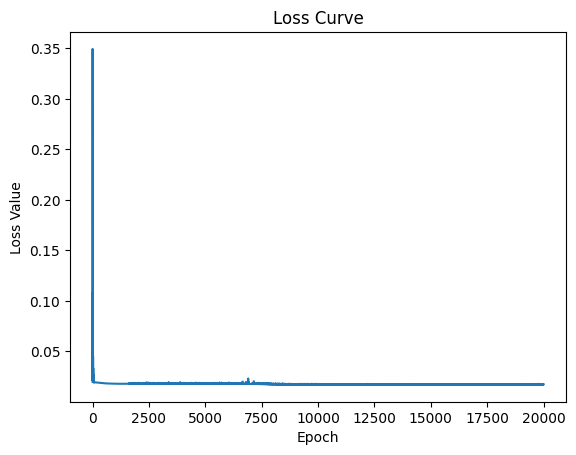

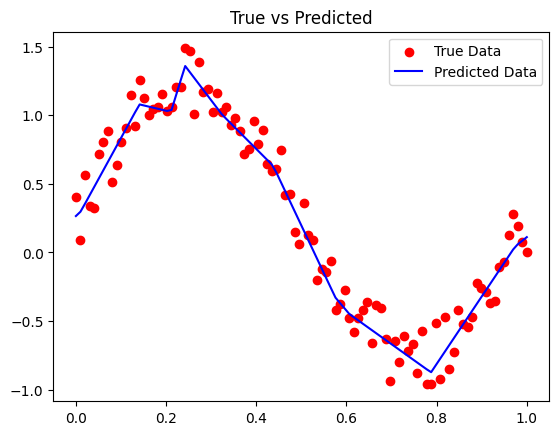

In [43]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []

# Обучение модели
epochs = 20000
for epoch in range(epochs):
    # Прямой проход (forward)
    y_pred = model(X)
    
    # Вычисление потерь
    loss = criterion(y_pred, y)
    
    # Обратное распространение (backward)
    optimizer.zero_grad()  # Обнуляем градиенты
    loss.backward()  # Вычисляем градиенты
    optimizer.step()  # Обновляем параметры модели
    
    # Запись потерь для графика
    losses.append(loss.item())
    
    # Вывод каждые 1000 эпох
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()}")

# Построение графика функции потерь
plt.plot(range(len(losses)), losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.show()

# Визуализация предсказаний после обучения
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X, y, color="r", label="True Data")
plt.plot(X, y_pred, label="Predicted Data", color="b")
plt.title("True vs Predicted")
plt.legend()
plt.show()

## 3.3 Построение сетей при помощи `torch.nn`

In [10]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [31]:
class mymodel(nn.Module):
    def __init__(self,n_f):
        super(mymodel,self).__init__()
        self.fc1= nn.Linear(n_f,20)
        self.fc12= nn.Linear(20,30)
        self.fc2= nn.Linear(30,1)
        self.relu = nn.ReLU()
    def __call__(self,x):
        return self.fc2(self.relu(self.fc12(self.relu(self.fc1(x)))))

In [32]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [37]:
import torch.optim as optim

In [38]:
# my= mymodel(1)
my = nn.Sequential(
                nn.Linear(X.shape[1], 20),
                nn.ReLU(),
                nn.Linear(20, 30),
                nn.ReLU(),
                nn.Linear(30, 1))
opt= optim.SGD(my.parameters(),lr=0.01)
criterion = nn.MSELoss()
los = []

for epoch in range(20000):
        y_pred = my(X)
        loss = criterion(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()                     
        los.append(loss.item())
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 0.46275126934051514
Epoch: 1000 | Loss: 0.1415378898382187
Epoch: 2000 | Loss: 0.12706878781318665
Epoch: 3000 | Loss: 0.10762481391429901
Epoch: 4000 | Loss: 0.07900343835353851
Epoch: 5000 | Loss: 0.045290619134902954
Epoch: 6000 | Loss: 0.02133502997457981
Epoch: 7000 | Loss: 0.010888833552598953
Epoch: 8000 | Loss: 0.006197403650730848
Epoch: 9000 | Loss: 0.003820463316515088
Epoch: 10000 | Loss: 0.002651775488629937
Epoch: 11000 | Loss: 0.0020410106517374516
Epoch: 12000 | Loss: 0.0016863638302311301
Epoch: 13000 | Loss: 0.001433354220353067
Epoch: 14000 | Loss: 0.0012575463624671102
Epoch: 15000 | Loss: 0.0011502669658511877
Epoch: 16000 | Loss: 0.0010818281443789601
Epoch: 17000 | Loss: 0.0010356524726375937
Epoch: 18000 | Loss: 0.0010050892597064376
Epoch: 19000 | Loss: 0.0009831293718889356


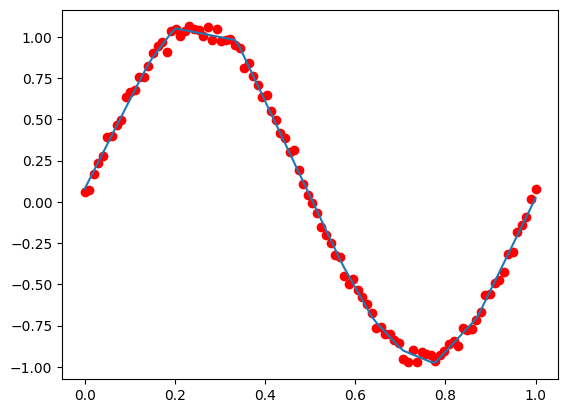

In [39]:
plt.plot(X.detach(),y_pred.detach())
plt.scatter(X, y,color="r");

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

## 3.4. Datasets and dataloaders

В библиотеке PyTorch DataLoader является важным компонентом для управления загрузкой данных, который упрощает итерацию по данным во время тренировки нейронных сетей. DataLoader используется для создания сложных и гибких конвейеров загрузки данных, что особенно полезно при работе с большими наборами данных или при выполнении операций, требующих предварительной обработки данных.

### Основные функции DataLoader в PyTorch
#### Батчинг: Автоматически собирает отдельные элементы данных в батчи или пакеты. Это упрощает обработку нескольких образцов одновременно в модели.
#### Перемешивание: Перемешивает данные перед каждой эпохой обучения, что помогает предотвратить переобучение и гарантирует, что модель не учится определённому порядку представления данных.
#### Параллельная загрузка: Поддерживает загрузку данных в нескольких потоках с использованием num_workers, что значительно ускоряет предварительную обработку и подачу данных в модель, особенно на многопроцессорных системах.
#### Автоматическая обработка последнего батча: DataLoader автоматически обрабатывает последний батч, который может быть меньше, если размер набора данных не делится на размер батча.
#### Интеграция с Dataset: DataLoader тесно интегрирован с абстракцией Dataset, которая предоставляет интерфейс для доступа к данным. Dataset определяет, как загружать и форматировать данные, а DataLoader эффективно подаёт эти данные в модель.

In [40]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [42]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

dataset = TensorDataset(X, y)
dataloader= DataLoader(dataset,20,shuffle=True)

In [45]:
my = nn.Sequential(
                nn.Linear(X.shape[1], 20),
                nn.ReLU(),
                nn.Linear(20, 30),
                nn.ReLU(),
                nn.Linear(30, 1))
opt= optim.SGD(my.parameters(),lr=0.01)
criterion = nn.MSELoss()
los = []

for epoch in range(1000):
        for i, (x, y_) in enumerate(dataloader):
            y_pred = my(x)
            loss = criterion(y_pred, y_)
            loss.backward()
            opt.step()
            opt.zero_grad()                     
            los.append(loss.item())
            print(f"epoch {epoch}--Batch {i}: Loss: {loss.item()}")
            # if epoch % 1000 == 0:
            #     print(f"Epoch: {epoch} | Loss: {loss.item()}")

epoch 0--Batch 0: Loss: 0.399048388004303
epoch 0--Batch 1: Loss: 0.5963761806488037
epoch 0--Batch 2: Loss: 0.6010807752609253
epoch 0--Batch 3: Loss: 0.5822169780731201
epoch 0--Batch 4: Loss: 0.44611796736717224
epoch 1--Batch 0: Loss: 0.46972155570983887
epoch 1--Batch 1: Loss: 0.44541606307029724
epoch 1--Batch 2: Loss: 0.5688549876213074
epoch 1--Batch 3: Loss: 0.5536235570907593
epoch 1--Batch 4: Loss: 0.5531085729598999
epoch 2--Batch 0: Loss: 0.3946800231933594
epoch 2--Batch 1: Loss: 0.5827546119689941
epoch 2--Batch 2: Loss: 0.49296730756759644
epoch 2--Batch 3: Loss: 0.5936638116836548
epoch 2--Batch 4: Loss: 0.4768909811973572
epoch 3--Batch 0: Loss: 0.5712985992431641
epoch 3--Batch 1: Loss: 0.5404573678970337
epoch 3--Batch 2: Loss: 0.3671343922615051
epoch 3--Batch 3: Loss: 0.614769697189331
epoch 3--Batch 4: Loss: 0.40419238805770874
epoch 4--Batch 0: Loss: 0.47802287340164185
epoch 4--Batch 1: Loss: 0.43795567750930786
epoch 4--Batch 2: Loss: 0.595705509185791
epoch 4

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
class SinDataset(Dataset):
  def __init__(self):
    pass

  def __len__(self):
    pass

  def __getitem__(self, idx):
    pass

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    pass

  def __len__(self):
    pass

  def __getitem__(self, idx):
    pass

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform):
    # ....
    self.transform = transform
    # ....

  def __len__(self):
    pass

  def __getitem__(self, idx):
    # ...
    sample = self.X[idx], self.y[idx]
    if self.transform:
      sample = self.transform(sample)
    # ....

In [ ]:
class DropColsTransform:
  def __init__(self, drop):
    pass
  
  def __call__(self, sample):
    X, y = sample
    # <удаление из X столбцов self.drop>
    return X, y

In [ ]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    # <преобразование X и y в тензоры>
    return X, y

In [ ]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset(data, transforms.compose([drop, to_tensor]))
